In [64]:
#In this code, I:

#Created a function `plot_data` to handle both histogram and scatter plot visualizations.
#Added missing value handling using the median.
#Visualized the distribution of the target variable.
#Visualized histograms and scatter plots for the given features.
#Performed feature scaling using `StandardScaler`.
#Tuned the hyperparameters for the `RandomForestRegressor` using `GridSearchCV`.
#Evaluated the models using mean squared error, mean absolute error, and R^2 score.
#Displayed feature importances for the Random Forest model.
#Saved the best models using `pickle`.
#Loaded a saved model and made predictions on new data.


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB
None
Missing values per feature:
CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64


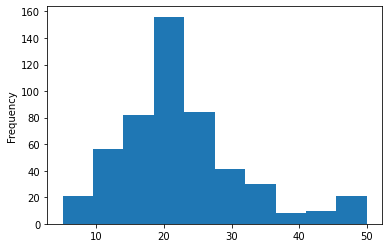

In [66]:
# Load data
data = pd.read_csv('Housing.csv')
print(data.info())
# Check missing values
print("Missing values per feature:")
print(data.isnull().sum())

# Preprocess data: fill missing values with the median
data.fillna(data.median(), inplace=True)

# Check the distribution of the target variable
data['MEDV'].plot(kind='hist')
plt.show()

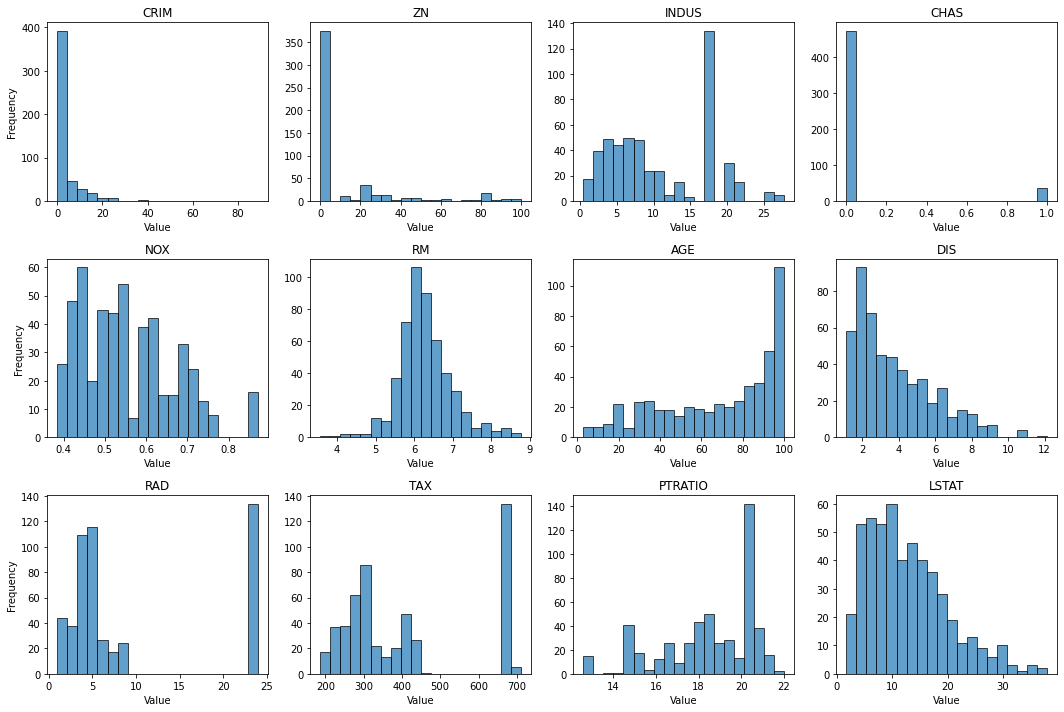

In [67]:
# Visualize histograms for the features

def plot_data(data, features, plot_type='histogram'):
    # Set up the plot grid
    rows = 3
    cols = 4
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

    for i, feature in enumerate(features):
        row, col = divmod(i, cols)
        ax = axes[row, col]

        if plot_type == 'histogram':
            ax.hist(data[feature], bins=20, edgecolor='k', alpha=0.7)
        elif plot_type == 'box':
            ax.boxplot(data[feature])

        # Set plot title and labels
        ax.set_title(feature)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

        # Only show y-axis label on the first column
        if col != 0:
            ax.set_ylabel('')

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

# Visualize histograms for the features
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']
plot_data(data, features, plot_type='histogram')


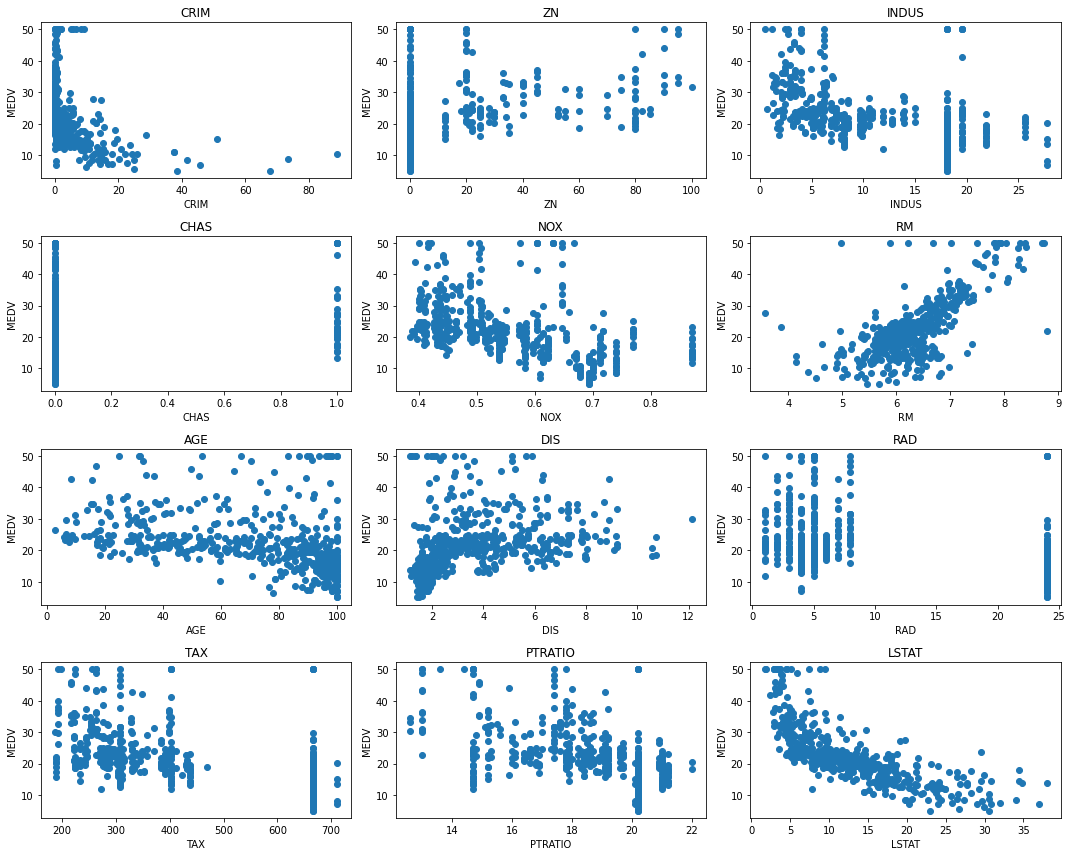

In [68]:
# Visualize scatter plots for the features against the target

def plot_data(df, features, target='MEDV', plot_type='scatter'):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, feature in enumerate(features):
        ax = axes[idx]
        if plot_type == 'scatter':
            ax.scatter(df[feature], df[target])
        elif plot_type == 'histogram':
            ax.hist(df[feature], bins=30)
        ax.set_title(feature)
        ax.set_xlabel(feature)
        ax.set_ylabel(target)

    plt.tight_layout()
    plt.show()

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']
target = 'MEDV'

plot_data(data, features, target, plot_type='scatter')


LinearRegression results:
MSE: 20.80
MAE: 2.99
R^2: 0.73

RandomForestRegressor results:
MSE: 8.35
MAE: 1.99
R^2: 0.89

Feature: CRIM, Importance: 0.0482
Feature: ZN, Importance: 0.0011
Feature: INDUS, Importance: 0.0063
Feature: CHAS, Importance: 0.0010
Feature: NOX, Importance: 0.0257
Feature: RM, Importance: 0.4831
Feature: AGE, Importance: 0.0150
Feature: DIS, Importance: 0.0667
Feature: RAD, Importance: 0.0045
Feature: TAX, Importance: 0.0090
Feature: PTRATIO, Importance: 0.0186
Feature: LSTAT, Importance: 0.3209


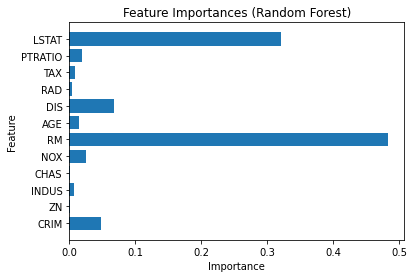

In [69]:
# Split data into training and testing sets
X = data[features]
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train and tune models
models = [LinearRegression(), RandomForestRegressor(random_state=42)]
best_models = []

for model in models:
    if isinstance(model, RandomForestRegressor):
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_model = model
        
    best_models.append(best_model)

# Model evaluation
for model in best_models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model.__class__.__name__} results:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R^2: {r2:.2f}\n")

# Feature importance (Random Forest model only)
rf_model = [model for model in best_models if isinstance(model, RandomForestRegressor)][0]
importances = rf_model.feature_importances_

for feature, importance in zip(features, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

#Plot feature importances

plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

# Save the best models
for model in best_models:
    model_name = type(model).__name__
    file_name = f"{model_name}_best_model.pkl"


In [70]:
import pickle
with open(file_name, 'wb') as file:
    pickle.dump(model, file)



In [71]:
#Load a saved model and make predictions

model_to_load = 'RandomForestRegressor_best_model.pkl'
with open(model_to_load, 'rb') as file:
    loaded_model = pickle.load(file)
new_data = np.array([[0.03, 0.0, 6.2, 0, 0.54, 5.5, 62.0, 4.5, 4, 300.0, 17.0, 5.5]])  # Replace with actual new data
new_data_scaled = scaler.transform(new_data)
new_prediction = loaded_model.predict(new_data_scaled)

print(f"Prediction for the new data: {new_prediction[0]:.2f}")

Prediction for the new data: 22.68


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
